### Solving Frozen Lake using Basic Q Learning
(Resolviendo Frozen Lake usando Basic Q Learning)

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import time

#setup frozen lake environment
#configurar el entorno del lago congelado
env = gym.make('FrozenLake-v1', map_name="4x4", is_slippery=False, render_mode='rgb_array')

q_table = np.zeros([env.observation_space.n, env.action_space.n]) # 64 x 4

# Hyperparameters
learning_rate = 0.9 #tasa de aprendizaje
discount_rate = 0.9 #tasa de descuento
epsilon = 1 #tasa de exploración. 1 = 100% de exploración
epsilon_decay_rate = 0.0001 #tasa de decaimiento de la tasa de exploración.
rand_num_gen = np.random.default_rng() #generador de números aleatorios

episodes = 10000 #número de episodios
rewards_per_episode = np.zeros(episodes) #recompensas por episodio

for episode in range(episodes):
    state = env.reset()[0]
    terminated = False
    truncated = False

    while(not terminated and not truncated):

        if rand_num_gen.random() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        new_state, reward, terminated, truncated, info = env.step(action)

        # Actualizar la tabla Q
        q_table[state,action] = q_table[state,action] + learning_rate * (
            reward + discount_rate * np.max(q_table[new_state,:]) - q_table[state,action]
        )

        state = new_state

    epsilon = max(epsilon - epsilon_decay_rate, 0)

    if(epsilon == 0):
        learning_rate = 0.0001

    if(reward == 1):
        rewards_per_episode[episode] = 1

env.close()

sum_rewards = np.zeros(episodes)
for t in range(episodes):
    sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])

### Results

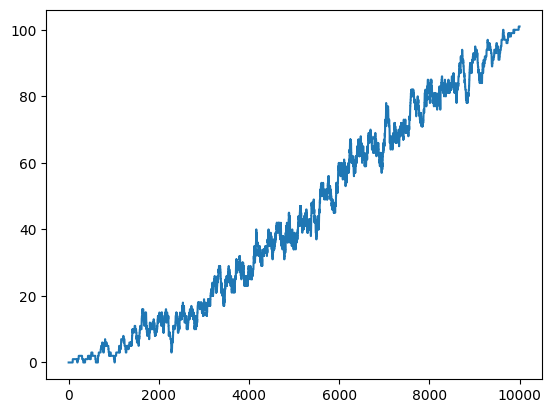

In [2]:
plt.plot(sum_rewards)
plt.savefig('frozen_lake8x8.png')

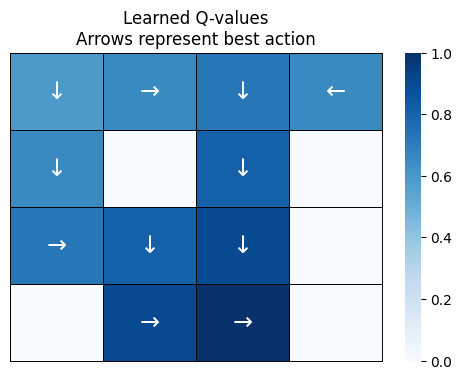

In [3]:
import sys
import os

# Add the parent directory to sys.path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.plotting import plot_q_values_grid

plot_q_values_grid(q_table, 4)